#Name Entity Recognition (NER)


Name Entity Recognition (NER) is a fundamental task in NLP that focuses on identifying and classifying entities such as names of people, organizations, locations, dates, and more within a given text. NER plays a crucial role in various NLP applications, including information retrieval, question answering, and sentiment analysis.

In this Lab, we will explore how to perform Name Entity Recognition using Python and NLP techniques. We will leverage libraries and tools, such as spaCy, NLTK, or Hugging Face's Transformers, to build NER models. These models can automatically detect and categorize entities in text, making it easier to extract valuable information and gain insights from unstructured data.

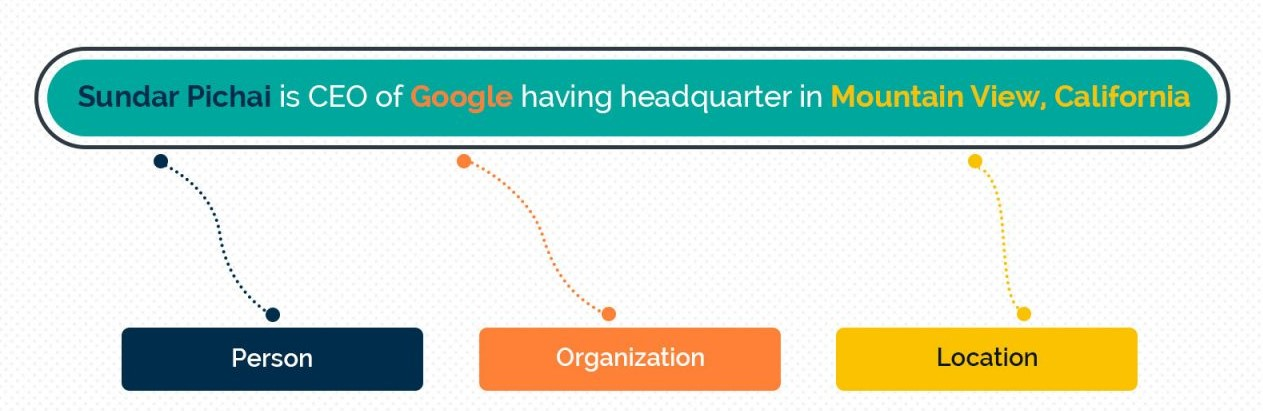

At its core, NLP is just a two-step process, below are the two steps that are involved:

1.   Detecting the entities from the text
2.   Classifying them into different categories





#NER using spaCy


SpaCy is a widely used open-source library for natural language processing in Python, and it offers robust support for Named Entity Recognition (NER). It comes with pre-trained models for multiple languages, including English, which can recognize a variety of named entities, such as persons, organizations, dates, locations, and more. Here's more information about using spaCy for NER:

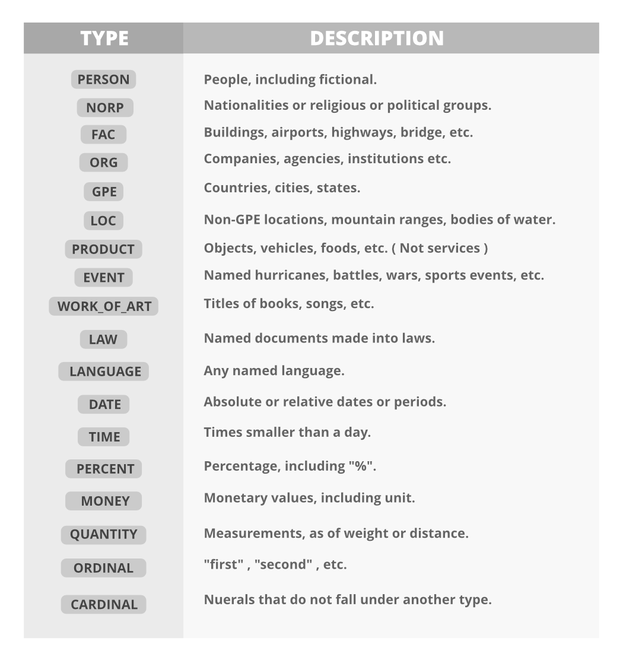

When performing Named Entity Recognition (NER) using spaCy or other NLP tools, you'll encounter various entity types, and they are represented as labels. Here are some common entity types and their labels:


**PERSON** (Label: "PERSON"): This entity type represents names of people. For example, "John Smith" or "Barack Obama" would be recognized as PERSON entities.

**ORGANIZATION** (Label: "ORG"): ORGANIZATION entities refer to the names of companies, institutions, agencies, and other organized entities. For instance, "Microsoft" or "United Nations" would be labeled as ORGANIZATION entities.

**LOCATION** (Label: "GPE" or "LOC"): These entities represent geographical locations, such as cities, states, countries, or natural landmarks. Examples include "New York" or "Eiffel Tower."

**DATE** (Label: "DATE"): DATE entities can include specific calendar dates, time intervals, or relative dates. For example, "January 1, 2023" or "tomorrow" would be DATE entities.

**TIME** (Label: "TIME"): TIME entities represent clock times or time intervals. For instance, "2:30 PM" or "5 minutes" would be labeled as TIME entities.

**MONEY** (Label: "MONEY"): MONEY entities refer to monetary values, including currencies and amounts. For example, "$100" or "€50" would be recognized as MONEY entities.

**PERCENT** (Label: "PERCENT"): These entities represent percentage values, such as "50%" or "10 percent."

**PRODUCT** (Label: "PRODUCT"): PRODUCT entities are used for names of products or goods. For instance, "iPhone" or "Coca-Cola" could be labeled as PRODUCT entities.

**EVENT** (Label: "EVENT"): EVENT entities are used to recognize names of events or occurrences, such as "World Cup" or "New Year's Eve."

**LAW** (Label: "LAW"): LAW entities refer to legal references, statutes, or legal concepts. For example, "Copyright Act" or "First Amendment" could be recognized as LAW entities.

**LANGUAGE** (Label: "LANGUAGE"): This entity type is used to identify names of languages, such as "English" or "Spanish."

**NORP** (Label: "NORP"): NORP stands for "Nationalities or Religious or Political Groups." It is used to recognize names of nationalities, ethnic groups, or political affiliations. Examples include "American" or "Buddhist."

In this example, we will use the popular NLP library, spaCy, to perform NER on some sample text. Make sure you have spaCy installed; if not, you can install it using :
`pip install spacy`

In [3]:
# Import the spaCy library and load the English language model
import spacy
nlp = spacy.load("en_core_web_sm")

# Sample text for NER
text = "Apple Inc. was founded by Steve Jobs in Cupertino, California. It is known for its iPhone and Mac products."
doc = nlp(text)

# Extract and print named entities
for entity in doc.ents:
    print(f"Entity: {entity.text}, Label: {entity.label_}")

Entity: Apple Inc., Label: ORG
Entity: Steve Jobs, Label: PERSON
Entity: Cupertino, Label: GPE
Entity: California, Label: GPE
Entity: iPhone, Label: ORG
Entity: Mac, Label: PERSON


In [4]:
# Iterate through recognized entities and print their details
for ent in doc.ents:
    print(f"Entity: {ent.text}")
    print(f"Label: {ent.label_}")
    print(f"Start Position: {ent.start}")
    print(f"End Position: {ent.end}")
    print(f"Entity Type: {spacy.explain(ent.label_)}")
    print("")

Entity: Apple Inc.
Label: ORG
Start Position: 0
End Position: 2
Entity Type: Companies, agencies, institutions, etc.

Entity: Steve Jobs
Label: PERSON
Start Position: 5
End Position: 7
Entity Type: People, including fictional

Entity: Cupertino
Label: GPE
Start Position: 8
End Position: 9
Entity Type: Countries, cities, states

Entity: California
Label: GPE
Start Position: 10
End Position: 11
Entity Type: Countries, cities, states

Entity: iPhone
Label: ORG
Start Position: 17
End Position: 18
Entity Type: Companies, agencies, institutions, etc.

Entity: Mac
Label: PERSON
Start Position: 19
End Position: 20
Entity Type: People, including fictional



In spaCy, you can add custom entities that have not been identified in the pre-trained models by training your own Named Entity Recognition (NER) model. This involves providing labeled examples of your custom entities and then fine-tuning the model.

Here is an example of how to train a custom NER model in spaCy: https://spacy.io/usage/training#ner

In [5]:
import spacy
nlp = spacy.load("en_core_web_sm")

text = "This agreement is made and entered into by and between 'Abc & Co.' and 'Bcd LLC' for a partnership."
doc = nlp(text)

for ent in doc.ents:
    print(ent.text, ent.label_)

Abc & Co.' ORG


In [6]:
import spacy
from spacy.training.example import Example
from spacy.training.iob_utils import offsets_to_biluo_tags

# Load the pre-trained model
nlp = spacy.load("en_core_web_sm")

# Create a new entity name and label
new_organization_name = "Bcd LLC"
new_organization_label = "ORG"

# Annotate a text with the new entity
text = "This agreement is made and entered into by and between 'Abc & Co.' and 'Bcd LLC' for a partnership."
annotations = [(text.find(new_organization_name), text.find(new_organization_name) + len(new_organization_name), new_organization_label)]

# Use offsets_to_biluo_tags to check entity alignment
doc = nlp.make_doc(text)
tags = offsets_to_biluo_tags(doc, annotations)

# Print the tags to check alignment
print(tags)

# Convert the text and updated annotations into a spaCy Example
example = Example.from_dict(doc, {"entities": annotations})

# Add the example to the training data
nlp.update([example], drop=0.02)  # You may need to adjust the drop parameter

# Save the updated model
nlp.to_disk("custom_ner_model")

['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-ORG', 'L-ORG', 'O', 'O', 'O', 'O', 'O']


In [7]:
# Load and use the custom model for entity recognition
custom_nlp = spacy.load("custom_ner_model")

# Process the text
doc2 = custom_nlp(text)

# Print recognized entities
for ent in doc2.ents:
    print(ent.text, ent.label_)

Bcd LLC' ORG


#visualization

In [11]:
# Entity visualization
from spacy import displacy
displacy.render(doc, style="ent", jupyter=True)

#Task1

#Task2

END